# Morpion Solitaire: random exploration

In this notebook we perform a random exploration of different variations of the game

In [1]:
from MorpionSolitaire import *
from tqdm.notebook import trange
import ipywidgets as widgets

This function simply picks at random one of the allowed moves at any stage of the game

In [2]:
def pickatrandom(game): return np.random.randint(len(game.moves))

## Cross

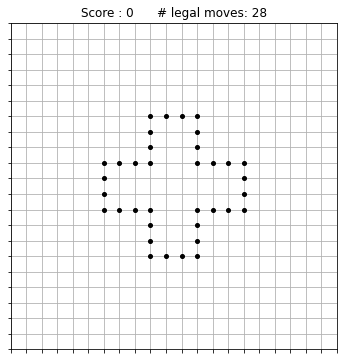

In [3]:
base = StartingGame()
base.print()

We run 10,000 random games, keep track of the scores, and preserve the best result

In [4]:
scores = []
bestscore = 0
bestgame = base

In [5]:
for _ in trange(10000):
    randomgame = base.play(pickatrandom)
    scores.append(randomgame.score)
    if randomgame.score > bestscore:
        bestscore = randomgame.score
        bestgame = randomgame
max(scores)

85

Best game obtained:

In [6]:
def printbestgame(step, moves):
    return bestgame.get_parent(bestgame.score - step).print(show_legal_moves = moves)

widgets.interact(printbestgame,
                 step = widgets.IntSlider(min=0, max=bestgame.score, step=1, value=bestgame.score,
                                          continuous_update=False),
                 moves = False);

interactive(children=(IntSlider(value=85, continuous_update=False, description='step', max=85), Checkbox(value…

Histogram showing the frequency of each score

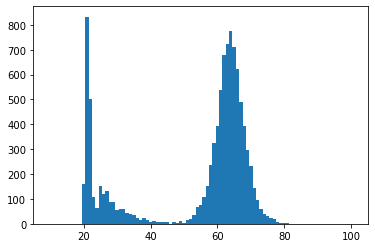

In [7]:
hmin = 10
hmax = 100
plt.hist(scores, bins=hmax-hmin+1, range=(hmin-0.5,hmax+0.5))
plt.show()

This shows that despite simple rules, the dynamics of the game is very interesting: many random explorations end with a miserable score of about 20-25 points, but when the 40-points barrier is passed, they are again many more possible outputs, with a peak around 65 points. It is in fact very hard to reach high scores from a purely random exploration.

## Baseline model

In order to gauge how the AI is performing, we build a simple model that estimates how many points can still be added to a given grid based on the random data

In [8]:
expdata = [np.array([x for x in scores if x >= i]).mean() - i for i in range(bestscore)]

In [9]:
# np.save('rand_expectation.npy', expdata)

In [10]:
expdata = np.load('rand_expectation.npy')

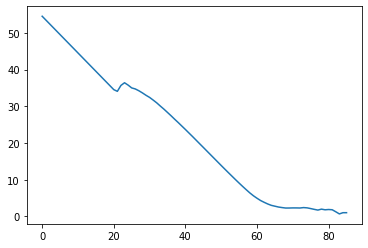

In [11]:
plt.plot(expdata)
plt.show()

In [12]:
def expectation(n):
    if n < len(expdata):
        return expdata[n]
    return 0

At the beginning of the game, you can expect to reach 55 points on average

In [13]:
expectation(0)

54.5269

Once you have reached a score of 40, you can expect to be able to add 24 more points

In [14]:
expectation(40)

23.6735332464146

Once you have reached a score of 70, you can only expect to add 2 more points

In [15]:
expectation(70)

2.304747320061253